# Fetch from GenBank

In [1]:
from reprophylo import *

Download all available 12S sequences for a list of UK bird taxa from Genbank.

The list of binomial species names was prepared in a simple text file: UK_Birds_Species_List.txt.

In [2]:
!head ./UK_Birds_Species_List.txt

Aix galericulata
Alopochen aegyptiacus
Anas acuta
Anas americana 
Anas carolinensis 
Anas clypeata
Anas crecca
Anas discors 
Anas formosa  
Anas penelope


When performing genbank search, write the search result to a text file to easily identify species that have 0 records on genbank. For species where they are the only UK species in that genus and have no records, records from European sister species must be downloaded.

In [3]:
!fetch_from_db.py -t UK_Birds_Species_List.txt -m 12S -o UK_bird_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk > fetch_birds_log.txt

In [4]:
!head fetch_birds_log.txt


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)



Write out species which have no records to a new text file.

In [5]:
!grep "\b0\b" fetch_birds_log.txt > missing_birds.txt

Several UK species that were the sole species in a genus did not have records available on genbank. Similarly, in some genus, there was only one species that was represented whilst all others had 0 records.

Sister species for missing species were identified and were included in the species list where possible to ensure greater coverage for 12S in the reference database. Where possible, these were European sister species but sometimes only non-European sister species were available. The altered species list will be used to fetch sequences again from genbank.

NB: no need to create log file this time.

In [6]:
!fetch_from_db.py -t UK_Birds_Supp_Species_List.txt -m 12S -o UK_supp_bird_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Accipiter gentilis	5
#	Accipiter nisus	4
#	Acrocephalus aedon	2
#	Acrocephalus agricola	0
#	Acrocephalus arundinaceus	3
#	Acrocephalus dumetorum	1
#	Acrocephalus melanopogon	0
#	Acrocephalus paludicola	0
#	Acrocephalus palustris	0
#	Acrocephalus schoenobaenus	0
#	Acrocephalus scirpaceus	3
#	Actitis hypoleucos	1
#	Actitis macularius	2
#	Aegithalos caudatus	3
#	Aegolius acadicus	2
#	Aegolius funereus	0
#	Aix galericulata	5
#	Alauda arvensis	2
#	Alca torda	2
#	Alcedo atthis	0
#	Alectoris rufa	13
#	Alle alle	2
#	Alopochen aegyptiacus	1
#	Anas acuta	6
#	Anas americana	3
#	Anas carolinensis	3
#	A

Read reference sequences into ReproPhylo and filter to keep only proper 12S records.

In [7]:
list_loci_in_genbank('UK_supp_bird_12S_Genbank_raw.gb', # The input genbank file
                     'bird_loci.csv',      # The loci file
                     'bird_loci_counts.txt')

In [8]:
!cat bird_loci_counts.txt


There are 120 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
1 instances of CDS,ALDOC
3 instances of CDS,ATP synthase F0 subunit 6
3 instances of CDS,ATP synthase F0 subunit 8
7 instances of CDS,ATP synthase subunit 6
7 instances of CDS,ATP synthase subunit 8
302 instances of CDS,ATP6
6 instances of CDS,atp6
301 instances of CDS,ATP8
6 instances of CDS,atp8
8 instances of CDS,ATPase 6
8 instances of CDS,ATPase 8
1 instances of CDS,ATPase6
1 instances of CDS,ATPase8
5 instances of CDS,c-mos
1 instances of CDS,CACNA1E
1 instances of CDS,CO I
1 instances of CDS,CO II
1 instances of CDS,CO III
15 instances of CDS,CO1
15 instances of CDS,CO2
15 instances of CDS,CO3
2 instances of CDS,cob
10 instances of CDS,COI
8 instances of CDS,COII
9 instances of CDS,COIII
8 instances of CDS,cox1
278 instances of CDS,COX1
279 instances of CDS,COX2
8 instances of CDS,cox2
278 instances of CDS,COX3
8 inst

In [9]:
!cat bird_loci.csv

dna,rRNA,12S-rRNA,12S-rRNA
dna,rRNA,12S_mitochondrial_ribosomal_RNA,12S mitochondrial ribosomal RNA
dna,rRNA,12S_small_subunit_ribosomal_RNA,12S small subunit ribosomal RNA
dna,rRNA,12SrRNA,12SrRNA
dna,rRNA,16S-rRNA,16S-rRNA
dna,rRNA,16SrRNA,16SrRNA
dna,CDS,ALDOC,ALDOC
dna,CDS,ATP_synthase_F0_subunit_6,ATP synthase F0 subunit 6
dna,CDS,ATP_synthase_F0_subunit_8,ATP synthase F0 subunit 8
dna,CDS,ATP_synthase_subunit_6,ATP synthase subunit 6
dna,CDS,ATP_synthase_subunit_8,ATP synthase subunit 8
dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,CACNA1E,CACNA1E
dna,CDS,CO1,CO1
dna,CDS,CO2,CO2
dna,CDS,CO3,CO3
dna,CDS,CO_I,CO I
dna,CDS,CO_II,CO II
dna,CDS,CO_III,CO III
dna,CDS,C_mos,c-mos
dna,CDS,ERAL1,ERAL1
dna,CDS,FAM222B,FAM222B
dna,CDS,FLOT2,FLOT2
dna,CDS,KIAA0100,KIAA0100
dna,CDS,LOC104288438,LOC104288438
dna,CDS,MT-ATP6,ATP6,atp6,ATPase6
dna,CDS,MT-ATP8,ATP8,atp8,ATPase8
dna,CDS,MT-CO1,COI,cox1,COX1,cytochrome c oxidase subunit I
dna,CDS,MT-CO2,COII,COX2,cox2,cytochrome c oxi

Extract all synonyms for '12S' and write to text file.

In [10]:
%%file bird_target_locus.csv
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Writing bird_target_locus.csv


In [11]:
!cat bird_target_locus.csv

dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Now, repeat process and create outgroups that can be used for tree construction as reference points for all bird sequences. Reptiles such as *Trachemys scripta* (van Tuinen *et al.* 2000), *Lactera agilis* and *Vipera berus* are ideal outgroups.

In [12]:
%%file outgroup.txt
Lacerta agilis
Trachemys scripta
Vipera berus

Writing outgroup.txt


In [13]:
!fetch_from_db.py -t ../fetch_clean_align_tree/outgroup.txt -m 12S -o outgroups -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Lacerta agilis	8
#	Trachemys scripta	17
#	Vipera berus	5

total number of accessions fetched: 30


downloading 30 records .. processing 1000 accessions per batch

[Fri Oct 28 2016 09:27:03]	batch: 0000001	30 unique records downloaded	-> outgroups.0000001.gb	(total: 30 (100.00 %); remaining: 0 -> DONE!)

Concatenate all files	-> outgroups.gb



In [14]:
list_loci_in_genbank('outgroups.gb', 'outgroup_list_of_loci.csv')


There are 21 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
6 instances of CDS,ATP6
6 instances of CDS,ATP8
1 instances of CDS,COIII
6 instances of CDS,COX1
6 instances of CDS,COX2
6 instances of CDS,COX3
6 instances of CDS,CYTB
1 instances of CDS,cytochrome b
6 instances of CDS,ND1
7 instances of CDS,ND2
6 instances of CDS,ND3
6 instances of CDS,ND4
6 instances of CDS,ND4L
6 instances of CDS,ND5
6 instances of CDS,ND6
18 instances of rRNA,12S ribosomal RNA
7 instances of rRNA,12S rRNA
1 instances of rRNA,12S small subunit ribosomal RNA
6 instances of rRNA,16S ribosomal RNA
2 instances of rRNA,l-rRNA
2 instances of rRNA,s-rRNA
-------------------------------
Gene and count sorted by counts
-------------------------------
18 instances of rRNA,12S ribosomal RNA
7 instances of CDS,ND2
7 instances of rRNA,12S rRNA
6 instances of CDS,ATP6
6 instances of CDS,ATP8
6 instances of CDS,COX1
6 i

In [15]:
!cat outgroup_list_of_loci.csv

dna,rRNA,12S_small_subunit_ribosomal_RNA,12S small subunit ribosomal RNA
dna,CDS,MT-ATP6,ATP6
dna,CDS,MT-ATP8,ATP8
dna,CDS,MT-CO1,COX1
dna,CDS,MT-CO2,COX2
dna,CDS,MT-CO3,COIII,COX3
dna,CDS,MT-CYB,CYTB,cytochrome b
dna,CDS,MT-ND1,ND1
dna,CDS,MT-ND2,ND2
dna,CDS,MT-ND3,ND3
dna,CDS,MT-ND4,ND4
dna,CDS,MT-ND4L,ND4L
dna,CDS,MT-ND5,ND5
dna,CDS,MT-ND6,ND6
dna,rRNA,l-rRNA,l-rRNA
dna,rRNA,rrnL,16S ribosomal RNA
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA
dna,rRNA,s-rRNA,s-rRNA


# Reprophylo project

Start ReproPhylo project.

In [16]:
pj=Project('bird_target_locus.csv', pickle='bird_raw.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [12]:
# pj=unpickle_pj('bird_raw.pkl', git=False)
# Use this code cell if running program more than once.

Read bird sequences into ReproPhylo.

In [17]:
pj.read_embl_genbank(['UK_supp_bird_12S_Genbank_raw.gb', 'outgroups.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [18]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


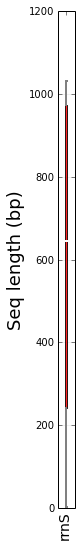

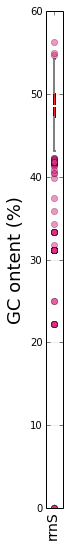

In [19]:
%matplotlib inline
pj.report_seq_stats()

In [20]:
pj.species_vs_loci('bird_species_vs_locus_raw.csv')

In [21]:
!cat bird_species_vs_locus_raw.csv

species	rrnS
Abrornis humei	2
Abrornis inornata	5
Abrornis proregulus	2
Acanthis flammea	2
Acanthis hornemanni	1
Accipiter gentilis	3
Accipiter gentilis fujiyamae	1
Accipiter nisus	4
Acrocephalus aedon	2
Acrocephalus arundinaceus	3
Acrocephalus dumetorum	1
Acrocephalus scirpaceus	2
Acrocephalus scirpaceus scirpaceus	1
Actitis hypoleucos	1
Actitis macularia	2
Aegithalos caudatus	2
Aegithalos caudatus caudatus	1
Aegolius acadicus	2
Aix galericulata	5
Alauda arvensis	2
Alca torda	2
Alectoris rufa	13
Alle alle	1
Alle alle polaris	1
Alopochen aegyptiacus	1
Anas acuta	6
Anas carolinensis	3
Anas clypeata	6
Anas crecca	6
Anas crecca crecca	2
Anas discors	76
Anas formosa	3
Anas platyrhynchos	31
Anas querquedula	1
Anser albifrons	3
Anser anser	9
Anser fabalis	3
Anthus novaeseelandiae	2
Anthus pratensis	1
Apus affinis	4
Apus apus	6
Apus pacificus	3
Apus pallidus	3
Aquila chrysaetos	2
Aquila chrysaetos japonica	1
Aquila nipalensis	1
Ardea alba	1
Ardea cinerea	3
Ardea purpurea	3
Ardeola bacchus	3
A

In [22]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 1352
Number of species (see below for full list): 404
['Gavia pacifica', 'Anthus novaeseelandiae', 'Anser fabalis', 'Tetrao urogallus', 'Platalea leucorodia', 'Perdix perdix', 'Coturnix coturnix', 'Podilymbus podiceps', 'Erithacus rubecula', 'Tetrax tetrax', 'Zenaida macroura', 'Poecile montanus', 'Fulica atra', 'Onychoprion fuscatus', 'Vanellus resplendens', 'Bombycilla garrulus', 'Pandion haliaetus', 'Alle alle', 'Lyrurus tetrix', 'Limnodromus griseus', 'Calidris alpina', 'Mareca strepera', 'Stercorarius pomarinus', 'Puffinus griseus', 'Sterna paradisaea', 'Turdus ruficollis', 'Ardea alba', 'Tringa glareola', 'Phalaropus lobatus', 'Remiz consobrinus', 'Synthliboramphus antiquus', 'Ixobrychus cinnamomeus', 'Falco peregrinus', 'Limosa limosa', 'Seiurus aurocapilla', 'Chrysolophus pictus', 'Coccyzus erythropthalmus', 'Serinus serinus', 'Falco naumanni', 'Sterna hirundo', 'Ixobrychus sinensis', 'Streptopelia orientalis', 'Aix galericulata', 'Aegolius acadicus', '

In [23]:
def crop_to_CDS(record):
    """The function crops a Genbank record to only retain the sequence of the first CDS"""
    
    from Bio import SeqFeature
    
    strands=[]
    r = record
    print "\nprocessing record: '%s' " %r.id,
    if r.features:
        for feature in r.features:
            if feature.type == 'CDS':
                strands.append(feature.location.strand)
                gene_name = feature.qualifiers['gene'][0]
                r.seq = r.seq[feature.location.start:feature.location.end]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                             1)
                break    
            elif feature.type == 'rRNA':
                strands.append(feature.location.strand)
                qualifiers = feature.qualifiers
                               
                if 'product' in qualifiers:
                    gene_name = feature.qualifiers['product'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)
                    break
                elif 'gene' in qualifiers:
                    gene_name = feature.qualifiers['gene'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)

                
        for feature in r.features:
            if feature.type == 'source':
                strands.append(feature.location.strand)
                feature.qualifiers['note'] = ['modified from original record: cropped to only CDS/rRNA '+str(gene_name)]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(len(r.seq)), 
                                                             feature.location.strand)
                break
                    
        if len(list(set(strands))) > 1:
            r.seq = r.seq.reverse_complement()
            print "\t.. reverse complementing",

        print "\t.. final length: %s" %len(r.seq),

    else:
        print "\t  no features found .."

    #print r.format('genbank')

In [24]:
for r in pj.records:
#    print r.format('genbank')
    crop_to_CDS(record=r)


processing record: 'LC012932.1'  	.. final length: 651 
processing record: 'HQ852944.1'  	.. final length: 433 
processing record: 'JF914826.1'  	.. final length: 242 
processing record: 'AF173685.1'  	.. final length: 393 
processing record: 'AY894140.1'  	.. final length: 557 
processing record: 'EF532932.1'  	.. final length: 970 
processing record: 'DQ674556.1'  	.. final length: 966 
processing record: 'KJ190955.1'  	.. final length: 976 
processing record: 'JQ422424.1'  	.. final length: 151 
processing record: 'KP184518.1'  	.. final length: 987 
processing record: 'KJ643141.1'  	.. final length: 971 
processing record: 'AF173576.1'  	.. final length: 973 
processing record: 'DQ674554.1'  	.. final length: 970 
processing record: 'JQ422431.1'  	.. final length: 151 
processing record: 'U89213.1'  	.. final length: 924 
processing record: 'FN675610.1'  	.. final length: 644 
processing record: 'KJ722534.1'  	.. final length: 972 
processing record: 'KC463856.1'  	.. final length

Convert cleaned records to genbank and fasta format in order to perform vsearch and remove redundancy.

In [25]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    temp.append(r)

out = open('bird_12S_raw_cleaned.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('bird_12S_raw_cleaned.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 1352 records


Pickle the project.

In [26]:
pickle_pj(pj, 'bird_raw.pkl')

'bird_raw.pkl'

# Vsearch - remove redundancy

Remove redundancy by clustering the 12S rRNA sequences with vsearch.

In [27]:
!vsearch -threads 5 --cluster_fast bird_12S_raw_cleaned.fa --strand both --uc 12S_id-1.uc --id 1 --query_cov 1

vsearch v1.1.0_linux_x86_64, 31.3GB RAM, 8 cores
https://github.com/torognes/vsearch

Reading file bird_12S_raw_cleaned.fa 100%
816388 nt in 1245 seqs, min 35, max 1031, avg 656
Indexing sequences 100%
Masking 100%
Sorting by length 100%
Counting unique k-mers 100%
Clustering 100%
Writing clusters 100%
Clusters: 686 Size min 1, max 82, avg 1.8
Singletons: 460, 36.9% of seqs, 67.1% of clusters


In [28]:
pj = Project('bird_target_locus.csv', pickle='bird_nr.pkl', git=False)

In [29]:
#pj = unpickle_pj('bird_nr.pkl', git=False)

In [30]:
pj.read_embl_genbank(['bird_12S_raw_cleaned.gb'])

In [31]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


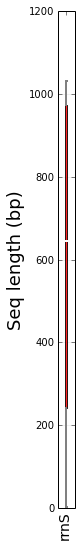

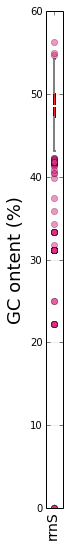

In [32]:
%matplotlib inline
pj.report_seq_stats()

In [33]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 1352
Number of species (see below for full list): 404
['Gavia pacifica', 'Anthus novaeseelandiae', 'Anser fabalis', 'Tetrao urogallus', 'Platalea leucorodia', 'Perdix perdix', 'Coturnix coturnix', 'Podilymbus podiceps', 'Erithacus rubecula', 'Tetrax tetrax', 'Zenaida macroura', 'Poecile montanus', 'Fulica atra', 'Onychoprion fuscatus', 'Vanellus resplendens', 'Bombycilla garrulus', 'Pandion haliaetus', 'Alle alle', 'Lyrurus tetrix', 'Limnodromus griseus', 'Calidris alpina', 'Mareca strepera', 'Stercorarius pomarinus', 'Puffinus griseus', 'Sterna paradisaea', 'Turdus ruficollis', 'Ardea alba', 'Tringa glareola', 'Phalaropus lobatus', 'Remiz consobrinus', 'Synthliboramphus antiquus', 'Ixobrychus cinnamomeus', 'Falco peregrinus', 'Limosa limosa', 'Seiurus aurocapilla', 'Chrysolophus pictus', 'Coccyzus erythropthalmus', 'Serinus serinus', 'Falco naumanni', 'Sterna hirundo', 'Ixobrychus sinensis', 'Streptopelia orientalis', 'Aix galericulata', 'Aegolius acadicus', '

Extract ids of representative sequences identified by vsearch -> remove all others from the object.

In [34]:
ids = []

uc=open('12S_id-1.uc', 'r')

for line in uc:
    if line.startswith('C'):
        ids.append(line.split("\t")[8])
        
recs_to_keep = {'rrnS': ids}
recs_to_drop = {'rrnS': []}

for r in pj.records:
    if not r.id in recs_to_keep['rrnS']:
        recs_to_drop['rrnS'].append(r.id)
        
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 666
to keep: 686
TOTAL: 1352


Exclude redundant records from object.

In [35]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [36]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 686
Number of species (see below for full list): 394
['Gavia pacifica', 'Anthus novaeseelandiae', 'Anser fabalis', 'Tetrao urogallus', 'Platalea leucorodia', 'Perdix perdix', 'Coturnix coturnix', 'Podilymbus podiceps', 'Erithacus rubecula', 'Tetrax tetrax', 'Zenaida macroura', 'Poecile montanus', 'Fulica atra', 'Onychoprion fuscatus', 'Vanellus resplendens', 'Bombycilla garrulus', 'Pandion haliaetus', 'Alle alle', 'Lyrurus tetrix', 'Limnodromus griseus', 'Calidris alpina', 'Mareca strepera', 'Stercorarius pomarinus', 'Puffinus griseus', 'Sterna paradisaea', 'Turdus ruficollis', 'Ardea alba', 'Tringa glareola', 'Phalaropus lobatus', 'Remiz consobrinus', 'Synthliboramphus antiquus', 'Ixobrychus cinnamomeus', 'Falco peregrinus', 'Limosa limosa', 'Seiurus aurocapilla', 'Chrysolophus pictus', 'Coccyzus erythropthalmus', 'Serinus serinus', 'Falco naumanni', 'Sterna hirundo', 'Ixobrychus sinensis', 'Streptopelia orientalis', 'Aix galericulata', 'Aegolius acadicus', 'P

Write short 12S rRNA sequences (< 500bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [37]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 500:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('bird_short_to_align.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 152


# Filter by Length

Write cropped records (minimum length of 500bp) to Genbank file.

In [38]:
from Bio import SeqIO

temp=[]
for r in pj.records_by_locus['rrnS']:
    if len(r.seq) >= 500:
        temp.append(r)

out = open('bird12S_cropped_500bp.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('bird12S_cropped_500bp.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 534 records


Pickle the project.

In [39]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

Now view records in cropped genbank file.

In [40]:
for index, record in enumerate(SeqIO.parse("bird12S_cropped_500bp.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = LC012932.1_f0, length 651, with 0 features
index 1, ID = AY894140.1_f0, length 557, with 0 features
index 2, ID = EF532932.1_f0, length 970, with 0 features
index 3, ID = DQ674556.1_f0, length 966, with 0 features
index 4, ID = KJ190955.1_f0, length 976, with 0 features
index 5, ID = KP184518.1_f0, length 987, with 0 features
index 6, ID = KJ643141.1_f0, length 971, with 0 features
index 7, ID = AF173576.1_f0, length 973, with 0 features
index 8, ID = DQ674554.1_f0, length 970, with 0 features
index 9, ID = KC463856.1_f0, length 980, with 0 features
index 10, ID = KM577704.1_f0, length 979, with 0 features
index 11, ID = HQ852938.1_f0, length 537, with 0 features
index 12, ID = KJ909198.1_f0, length 973, with 0 features
index 13, ID = AF407141.1_f0, length 972, with 0 features
index 14, ID = EU167074.1_f0, length 972, with 0 features
index 15, ID = AM902522.1_f0, length 724, with 0 features
index 16, ID = AY631324.1_f0, length 688, with 0 features
index 17, ID = HQ852942.

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 500bp within Reprophylo.

In [41]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [40,60]
}
len_inliers = {
    'rrnS': [500,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


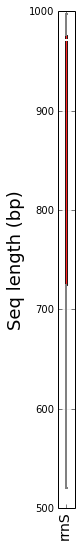

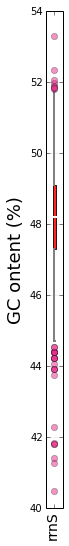

In [42]:
pj.report_seq_stats()

Pickle the project.

In [43]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

# Long Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 500bp. This will be done with the AlnConf class.

In [44]:
pj = unpickle_pj('bird_nr.pkl', git=False)

muscle default configuration:

In [45]:
muscle_default = AlnConf(pj,
                          method_name="muscleDefault",
                          program_name="muscle",
                          loci=['rrnS'])

muscle -in 829181477648182.51_rrnS.fasta


Once there are one or more AlnConf objects, they can be executed in one go using the Project method align. This method accepts a list of AlnConf objects and does whatever it is each of them tells it:

In [46]:
pj.align([muscle_default])

When the process is done, the AlnConf objects will be stored in pj.used_methods, which is a dictionary using the method names as keys. If you print one of these AlnConf objects as a string, you will get complete details about the process, including programme versions and references:

In [47]:
print pj.used_methods['muscleDefault']

AlnConf named muscleDefault with ID 829181477648182.51
Loci: rrnS 
Created on: Fri Oct 28 09:49:42 2016
Commands:
rrnS: muscle -in 829181477648182.51_rrnS.fasta

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
438.035852909


Core Methods section sentence:
The dataset(s) rrnS were first ali

The alignment itself is stored in the pj.alignments dictionary, using keys that follow this pattern: locus_name@method_name where method_name is the name you have provided to your AlnConf object.

In [48]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (523 records of length 1248, IUPACProtein()) at 7fa9982f8ad0>}

Alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID.

In [49]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault_aln.fasta']

Pickle the project.

In [50]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

# Build tree

The alignment needs to be trimmed to remove large gaps in sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm. With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [51]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 925941477648716.25_rrnS@muscleDefault.fasta -gappyout


In [52]:
pj.trim([muscle_gappyout])

In [53]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 925941477648716.25
Alignments: rrnS@muscleDefault 
Created on: Fri Oct 28 09:58:36 2016
Commands:
rrnS@muscleDefault@gappyout: trimal -in 925941477648716.25_rrnS@muscleDefault.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
6.01564192772

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault were trimmed using the program trimAl 1.2rev59 [1].

Reference:
Salvador

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [54]:
pj.trimmed_alignments

{'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (523 records of length 945, IUPACAmbiguousDNA()) at 7fa996a96b50>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [55]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML. 

Configure RAxML for trimmed muscle alignment.

In [56]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 198181477648804.44_rrnS@muscleDefault@gappyout0 -p 231 -s 198181477648804.44_rrnS@muscleDefault@gappyout.fasta -T 5 -x 743 -N 100


In [57]:
pj.tree([raxml])

In [58]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 198181477648804.44
Alignments: rrnS@muscleDefault@gappyout 
Created on: Fri Oct 28 10:00:04 2016
Commands:
rrnS@muscleDefault@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 198181477648804.44_rrnS@muscleDefault@gappyout0 -p 231 -s 198181477648804.44_rrnS@muscleDefault@gappyout.fasta -T 5 -x 743 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
19167.9062259

Core Methods section sentence:
Phy

Pickle the project.

In [59]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

# Visualise Tree

Now let's visualize the tree.

Prepare tree annotation:
- define outgroups
- specify support coloration

In [60]:
pj.add_qualifier_from_source('organism')

In [61]:
for species in ['Lacerta','Trachemys','Vipera']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [62]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [63]:
pj.clear_tree_annotations()

pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-birds-trimmed-500bp-raxml.html')

Check trees out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [64]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-birds-trimmed-500bp-raxml.png

**===========================================================================================**

# Format long alignment and sequence IDs

In [65]:
from reprophylo import *

In [3]:
pj = unpickle_pj('bird_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


- Identify the record IDs of the sequences shorter than 500bp
- Write these sequences for to new fasta file (make sure the sequece IDs are as Reprophylo expects them: 'id_f0')
- Prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [67]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (523 records of length 1248, IUPACProtein()) at 7fa9901e3d90>}

In [68]:
from Bio import AlignIO

out=open('500bp_bird_align.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [69]:
from Bio import SeqIO

records = list(SeqIO.parse("bird_short_to_align.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 152


Check that record IDs are in format that reprophylo expects for alignment.

In [70]:
from Bio import SeqIO

short_seq = open("bird_short_to_align.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

HQ852944.1_f0
JN695767.1_f0
HQ852934.1_f0
JF914828.1_f0
X86804.1_f0
JF914834.1_f0
EU197058.1_f0
L22477.1_f0
AY259390.1_f0
L33370.1_f0
AF140990.1_f0
AY887673.1_f0
AF173712.1_f0
EF027325.1_f0
GQ255993.1_f0
EU154560.1_f0
JQ422404.1_f0
JQ422391.1_f0
L33380.1_f0
KP171706.1_f0
AF285807.1_f0
AF285805.1_f0
FR873680.1_f0
AB042364.1_f0
AF285799.1_f0
KJ685955.1_f0
AF285801.1_f0
AF285803.1_f0
FJ627047.1_f0
AJ583550.1_f0
JX683977.1_f0
EF027329.1_f0
JQ422425.1_f0
AY766387.1_f0
KJ676690.1_f0
EU154487.1_f0
U88028.1_f0
JN695762.1_f0
KF781333.1_f0
U88024.1_f0
EU154539.1_f0
EF027314.1_f0
U88020.1_f0
X87621.1_f0
EF027324.1_f0
EU154549.1_f0
EU154488.1_f0
L33376.1_f0
KM078790.1_f0
AF376937.1_f0
JF914825.1_f0
KF781332.1_f0
AF202187.1_f0
AY903609.1_f0
AY887668.1_f0
L33388.1_f0
AY635103.1_f0
AF230152.1_f0
HQ852943.1_f0
EU154492.1_f0
HQ852945.1_f0
U38355.1_f0
EU154491.1_f0
KJ676688.1_f0
EF027300.1_f0
AF140997.1_f0
JQ962998.1_f0
JX683980.1_f0
JQ422386.1_f0
AY766388.1_f0
AF230156.1_f0
AF407431.1_f0
L33390.1_f0
AF

If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [71]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 500:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [72]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [73]:
for r in pj.records:
    if len(r.seq) < 500:
        print r.id
        print r.description

HQ852944.1
Emberiza spodocephala 12S ribosomal RNA gene, partial sequence.
JF914826.1
Anas discors voucher UAM:REW 124 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
AF173685.1
Anas platyrhynchos 12S ribosomal RNA gene, partial sequence; mitochondrial gene for mitochondrial product.
JQ422424.1
Aythya fuligula haplotype HAP39 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
JQ422431.1
Aythya fuligula haplotype HAP46 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
JN695767.1
Coturnix coturnix isolate Q1 12S ribosomal RNA gene, partial sequence; mitochondrial.
JF914838.1
Anas discors voucher UAM:REW 011 D-loop, partial sequence; tRNA-Phe gene, complete sequence; and 12S ribosomal RNA gene, partial sequence; mitochondrial.
HQ852934.1
Phylloscopus inornatus 12S ribosomal RNA 

Pickle the project.

In [74]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

# Feed short 12S rRNA sequences into long alignment

Previously, sequences shorter than 400bp were removed from the pj.records dictionary before a muscle alignment was performed. Short sequences can cause problems in global paired alignments when the alignment algorithm attempts to match them to much longer sequences.

Instead, we performed the long alignment of sequences longer than 400bp first and now we will attempt to incorporate the shorter sequences. This will be done using the hmmbuild command within the hmmer v3 program suite. to construct a Hidden Markov Model and produce a hmm file.

Prior to this external alignment, the record IDs had to be changed into a format reprophylo expects for tree construction: id_f0

In [2]:
!hmmbuild -h #for help

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmbuild [-options] <hmmfile_out> <msafile>

Basic options:
  -h     : show brief help on version and usage
  -n <s> : name the HMM <s>
  -o <f> : direct summary output to file <f>, not stdout
  -O <f> : resave annotated, possibly modified MSA to file <f>

Options for selecting alphabet rather than guessing it:
  --amino : input alignment is protein sequence data
  --dna   : input alignment is DNA sequence data
  --rna   : input alignment is RNA sequence data

Alternative model construction strategies:
  --fast           : assign cols w/ >= symfrac residues as consensus  [default]
  --hand           : manual construction (requires reference annotation)
  --symfrac <x>    :

In [3]:
!hmmbuild 12S_bird_ref.hmm 500bp_bird_align.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             500bp_bird_align.fasta
# output HMM file:                  12S_bird_ref.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     500bp_bird_align       523   945   945  1153     2.18  0.450 

# CPU time: 0.42u 0.00s 00:00:00.42 Elapsed: 00:00:00.42


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [4]:
!hmmalign -h #for help

# hmmalign :: align sequences to a profile HMM
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmalign [-options] <hmmfile> <seqfile>

Basic options:
  -h     : show brief help on version and usage
  -o <f> : output alignment to file <f>, not stdout

Less common options:
  --mapali <f>    : include alignment in file <f> (same ali that HMM came from)
  --trim          : trim terminal tails of nonaligned residues from alignment
  --amino         : assert <seqfile>, <hmmfile> both protein: no autodetection
  --dna           : assert <seqfile>, <hmmfile> both DNA: no autodetection
  --rna           : assert <seqfile>, <hmmfile> both RNA: no autodetection
  --informat <s>  : assert <seqfile> is in format <s>: no autodetection
  --outformat <s> : output alignment in format <s>  [Stockholm]

Seque

In [5]:
%%bash

hmmalign -o 12S_bird500bpref_plus_short_query.sto \
--mapali 500bp_bird_align.fasta \
12S_bird_ref.hmm bird_short_to_align.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [6]:
from Bio import AlignIO

input_file = open("12S_bird500bpref_plus_short_query.sto", "rU")
output_file = open("12S_BirdAlign_ALL.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 675 records


# Tree Building

The fasta file containing the 12S rRNA reptile sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [7]:
pj=unpickle_pj('bird_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [8]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_bird500bpref_plus_short_query.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

EU543221.1_f0 is 1517bp
KC990830.1_f0 is 1517bp
HQ442366.1_f0 is 1517bp
L28077.1_f0 is 1517bp
KM216749.1_f0 is 1517bp
FJ392294.1_f0 is 1517bp
KM216748.1_f0 is 1517bp
AY940754.1_f0 is 1517bp
U89208.1_f0 is 1517bp
AY940770.1_f0 is 1517bp
KF766027.1_f0 is 1517bp
KF766026.1_f0 is 1517bp
KF766041.1_f0 is 1517bp
KT350609.1_f0 is 1517bp
KF766048.1_f0 is 1517bp
KF766047.1_f0 is 1517bp
EU167057.1_f0 is 1517bp
U89224.1_f0 is 1517bp
U83759.1_f0 is 1517bp
U89227.1_f0 is 1517bp
EU167070.1_f0 is 1517bp
AF173597.1_f0 is 1517bp
EU167086.1_f0 is 1517bp
KT356220.1_f0 is 1517bp
AF406881.1_f0 is 1517bp
AF406882.1_f0 is 1517bp
KP889214.1_f0 is 1517bp
U89228.1_f0 is 1517bp
U83758.1_f0 is 1517bp
AY274022.1_f0 is 1517bp
AF173593.1_f0 is 1517bp
U83757.1_f0 is 1517bp
AY513589.1_f0 is 1517bp
AB918148.1_f0 is 1517bp
KT340630.1_f0 is 1517bp
KC749448.1_f0 is 1517bp
FN675609.1_f0 is 1517bp
FN675558.1_f0 is 1517bp
FN675611.1_f0 is 1517bp
AM902517.1_f0 is 1517bp
FN675553.1_f0 is 1517bp
FN675555.1_f0 is 1517bp
FN675565

In [9]:
pj.alignments['rrnS@bird_align_allseq'] = aln

In [10]:
pj.alignments

{'rrnS@bird_align_allseq': <<class 'Bio.Align.MultipleSeqAlignment'> instance (675 records of length 1517, DNAAlphabet()) at 7f8aaf0c51d0>,
 'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (523 records of length 1248, IUPACProtein()) at 7f8aaf4dd8d0>}

In [11]:
pj.alignments.keys()

['rrnS@bird_align_allseq', 'rrnS@muscleDefault']

The alignment needs trimming and removal of gaps within sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm.

With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [12]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@bird_align_allseq'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 982131477669212.7_rrnS@bird_align_allseq.fasta -gappyout


In [13]:
pj.trim([gappyout])

In [14]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 982131477669212.7
Alignments: rrnS@bird_align_allseq 
Created on: Fri Oct 28 15:40:12 2016
Commands:
rrnS@bird_align_allseq@gappyout: trimal -in 982131477669212.7_rrnS@bird_align_allseq.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
6.96598601341

Core Methods section sentence:
The alignment(s) rrnS@bird_align_allseq were trimmed using the program trimAl 1.2rev59 [1].

Refer

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [15]:
pj.trimmed_alignments

{'rrnS@bird_align_allseq@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (675 records of length 945, IUPACAmbiguousDNA()) at 7f8aaff24150>,
 'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (523 records of length 945, IUPACAmbiguousDNA()) at 7f8ab0bd7450>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [16]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta',
 'rrnS@bird_align_allseq@gappyout_trimmed_aln.fasta']

Write clipped alignment to file for downstream taxonomic curation using SATIVA.

In [18]:
from Bio import AlignIO

clipped_aln = pj.trimmed_alignments["rrnS@bird_align_allseq@gappyout"]

In [19]:
out=open('trimmed_bird_align_ALL.phy', 'w')
AlignIO.write(clipped_aln, out, 'phylip-relaxed')
out.close()

SATIVA requires a taxonomic file that has been generated from a genbank file containing all record IDs included in the trimmed alignment.

First, the alignment must be parsed in fasta format and record IDs altered to contain only the ID as entered on genbank e.g. EU116957.1

Next, the record IDs must be extracted from the trimmed alignment file.

In [20]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

input_file = AlignIO.read(open("rrnS@bird_align_allseq@gappyout_trimmed_aln.fasta"), "fasta")#, alphabet=generic_dna)

to_keep = []

for r in input_file:
    record_id = "_".join(r.id.split("_")[:-1])
    print record_id
    to_keep.append(record_id)

EU543221.1
KC990830.1
HQ442366.1
L28077.1
KM216749.1
FJ392294.1
KM216748.1
AY940754.1
U89208.1
AY940770.1
KF766027.1
KF766026.1
KF766041.1
KT350609.1
KF766048.1
KF766047.1
EU167057.1
U89224.1
U83759.1
U89227.1
EU167070.1
AF173597.1
EU167086.1
KT356220.1
AF406881.1
AF406882.1
KP889214.1
U89228.1
U83758.1
AY274022.1
AF173593.1
U83757.1
AY513589.1
AB918148.1
KT340630.1
KC749448.1
FN675609.1
FN675558.1
FN675611.1
AM902517.1
FN675553.1
FN675555.1
FN675565.1
KC749469.1
LC012932.1
AM902516.1
X57245.1
KC785614.1
KF955638.1
AM902520.1
FN675574.1
FN675567.1
FN675573.1
FJ752434.1
DQ832102.1
FJ752433.1
KJ502237.1
AM902515.1
FJ752430.1
KU049722.1
KT364526.1
U83742.1
KJ909193.1
AY136584.1
AF407103.1
KP995437.1
EU167054.1
U86142.1
KT004451.1
KU058639.1
KJ598622.1
HQ915867.1
JN018413.1
KF509923.1
Y18522.2
AF386463.1
KC463856.1
AY136582.1
JQ083495.1
KJ909187.1
AM889140.1
AY136575.1
AF484931.1
AF407098.1
AY136574.1
KJ499911.1
KP148840.1
KX398931.1
JQ071623.1
AY136560.1
AF407092.1
JQ322641.1
AF407094.1
A

You must create an empty list in which the record IDs in pj.records that match the record IDs from the trimmed alignment can be stored and then written out in a reduced genbank file.

In [21]:
out_gb = []

for r in pj.records:
    if r.id in to_keep:
        out_gb.append(r)

for r in out_gb:
    print r.id
    
out = open("12S_preSATIVA_birds.gb", "w")
SeqIO.write(out_gb, out, "genbank")
out.close()

LC012932.1
HQ852944.1
AY894140.1
EF532932.1
DQ674556.1
KJ190955.1
KP184518.1
KJ643141.1
AF173576.1
DQ674554.1
KC463856.1
JN695767.1
KM577704.1
HQ852938.1
KJ909198.1
AF407141.1
EU167074.1
AM902522.1
AY631324.1
HQ852942.1
HQ852934.1
AB219557.1
KM364882.1
KM251414.1
AF173565.1
KP757766.1
AY164523.1
DQ674562.1
HQ852932.1
AJ242686.1
KM264304.1
DQ485826.1
AY136561.1
KX230491.1
JF914828.1
EU167052.1
KJ190954.1
EU167054.1
KJ190952.1
AF173577.1
X86804.1
AF407088.1
AF173571.1
AY164515.1
KM873665.1
AF407139.1
JF914834.1
AY894144.1
AF447246.1
KJ190950.1
AJ242684.1
KT809406.1
U83757.1
EU197058.1
KP306517.1
AY164521.1
AY894142.1
AM902516.1
EU167057.1
L22477.1
KM078789.1
HQ852926.1
EF373114.2
AM902520.1
AY259390.1
L33370.1
JF730435.1
AY136575.1
KM078781.1
AY164519.1
NC_011818.1
AB219546.1
AF447250.1
AF140990.1
AF447248.1
EF373080.2
JX486030.1
KF684946.1
AY894148.1
DQ485828.1
AJ242688.1
U83716.1
AY136582.1
AF407098.1
AY887673.1
HQ852928.1
AF407103.1
AY894152.1
AB219552.1
AF407094.1
AF173712.1
AF407092

How to run SATIVA is described in a different notebook. It may be a good strategy to set this going now in a separate notebook. Then continue onwards in this notebook.

**===============================================================================================**

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [4]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@bird_align_allseq@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 715391477902330.86_rrnS@bird_align_allseq@gappyout0 -p 354 -s 715391477902330.86_rrnS@bird_align_allseq@gappyout.fasta -T 5 -x 434 -N 100


In [5]:
pj.tree([raxml])

In [6]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 715391477902330.86
Alignments: rrnS@bird_align_allseq@gappyout 
Created on: Mon Oct 31 08:25:30 2016
Commands:
rrnS@bird_align_allseq@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 715391477902330.86_rrnS@bird_align_allseq@gappyout0 -p 354 -s 715391477902330.86_rrnS@bird_align_allseq@gappyout.fasta -T 5 -x 434 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
12462.546211

Core Methods sectio

In [7]:
pj.trees.keys()

['rrnS@muscleDefault@gappyout@raxml-muscleDefault-trimmed',
 'rrnS@bird_align_allseq@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [8]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'

# Visualise tree

Now let's visualize the tree.

Prepare tree annotation:
 - define outgroups
 - specify support coloration

In [9]:
pj.add_qualifier_from_source('organism')

In [10]:
for species in ['Lacerta','Trachemys','Vipera']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [11]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [12]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-bird-all-raxml.html')

Check tree out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [13]:
%%bash

last_png=$(ls -hlrt *rrnS@bird_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-bird-all-raxml.png

**=========================================================================================**

In the meantime we have run SATIVA on the alignment that was the basis of the above tree.

Now we are going to highlight the records that SATIVA considers mislabelled in the tree. We are also going to add a heatmap to the tree illustrating the confidence that SATIVA has in a given call.

Parse SATIVA output and record putatively mislabelled sequence records and the confidence of the call.

In [14]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]

Add two new qualifiers containing info about he SATIVA results to the sequence features.

In [15]:
for r in pj.records:
    if r.id in rec_mislabelled:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['yes']
            f.qualifiers['mislabeled_conf'] = [rec_mislabelled[r.id]]
    else:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['no']
            f.qualifiers['mislabeled_conf'] = [0.0001]

In [16]:
pj.propagate_metadata()

Prepare tree annotation:

- color records that were identified by SATIVA as being mislabelled.
- add heatmap with mislabel confidence

In [17]:
leaf_colors = {'yes':'red', 'no': 'black'}
bg_colors = {'yes':'red', 'no': 'white'}

In [18]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-bird-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            leaf_node_color_meta = 'mislabeled', leaf_label_colors = leaf_colors)

In [19]:
%%bash

last_png=$(ls -hlrt *rrnS@bird_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png 12S_muscleDefault_trimmed_mammal_all_raxml_SATIVA_leaf_colored.png

In [20]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-bird-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            node_bg_meta = 'mislabeled', node_bg_color = bg_colors)

In [21]:
%%bash

target=12S_muscleDefault_trimmed_bird_all_SATIVA_bg_colored.png

last_png=$(ls -hlrt *rrnS@bird_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png $target

In [22]:
pickle_pj(pj, 'bird_nr.pkl')

'bird_nr.pkl'